In [1]:
import pandas as pd

In [2]:
TEAM_PATH = "data/DataFiles/Teams.csv"
SEASON_PATH = "data/DataFiles/Seasons.csv"
REGULAR_SEASON_PATH = "data/DataFiles/RegularSeasonDetailedResults.csv"
TOURNEY_RESULTS_PATH = "data/DataFiles/NCAATourneyDetailedResults.csv"
TOURNEY_SEEDS_PATH = "data/DataFiles/NCAATourneySeeds.csv"
MASSEY_ORDINALS_PATH = "data/MasseyOrdinals/MasseyOrdinals.csv"

In [3]:
teams = pd.read_csv(TEAM_PATH)
seasons = pd.read_csv(SEASON_PATH)
regular_season = pd.read_csv(REGULAR_SEASON_PATH)
tourney_results = pd.read_csv(TOURNEY_RESULTS_PATH)
tourney_seeds = pd.read_csv(TOURNEY_SEEDS_PATH)
massey_ordinals = pd.read_csv(MASSEY_ORDINALS_PATH)

In [4]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [5]:
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [6]:
regular_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [7]:
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [8]:
tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [9]:
massey_ordinals.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [10]:
print(teams.isnull().sum())
print(seasons.isnull().sum())
print(regular_season.isnull().sum())
print(tourney_results.isnull().sum())
print(tourney_seeds.isnull().sum())
print(massey_ordinals.isnull().sum())

TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64
Season     0
DayZero    0
RegionW    0
RegionX    0
RegionY    0
RegionZ    0
dtype: int64
Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64
Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
L

In [11]:
team_stats = regular_season.groupby(["Season", "WTeamID"]).agg(
    {
        "WScore": ["mean", "sum"],
        "WFGM": "mean",
        "WFGA": "mean",
        "WFGM3": "mean",
        "WFGA3": "mean",
        "WFTM": "mean",
        "WFTA": "mean",
        "WOR": "mean",
        "WDR": "mean",
        "WAst": "mean",
        "WTO": "mean",
        "WStl": "mean",
        "WBlk": "mean",
        "WPF": "mean",
    }
)

team_stats.columns = ["_".join(col).strip() for col in team_stats.columns.values]
team_stats = team_stats.reset_index()
team_stats.rename(columns={"WTeamID": "TeamID"}, inplace=True)
print(team_stats.head())

   Season  TeamID  WScore_mean  WScore_sum  WFGM_mean  WFGA_mean  WFGM3_mean  \
0    2003    1102    68.750000         825  22.583333  40.000000   10.000000   
1    2003    1103    87.769231        1141  30.000000  55.384615    5.461538   
2    2003    1104    74.705882        1270  25.823529  58.352941    7.058824   
3    2003    1105    79.428571         556  25.571429  61.857143    9.142857   
4    2003    1106    68.307692         888  24.769231  53.846154    5.846154   

   WFGA3_mean  WFTM_mean  WFTA_mean   WOR_mean   WDR_mean  WAst_mean  \
0   21.583333  13.583333  20.750000   3.833333  19.333333  16.916667   
1   14.384615  22.307692  30.923077   9.384615  21.461538  17.692308   
2   20.823529  16.000000  22.529412  13.529412  26.411765  14.000000   
3   22.428571  19.142857  25.714286  14.571429  25.857143  15.857143   
4   15.923077  12.923077  20.769231  12.769231  28.000000  13.000000   

    WTO_mean  WStl_mean  WBlk_mean   WPF_mean  
0  11.083333   7.333333   2.833333  16

In [12]:
team_stats_loss = regular_season.groupby(["Season", "LTeamID"]).agg(
    {
        "LScore": ["mean", "sum"],
        "LFGM": "mean",
        "LFGA": "mean",
        "LFGM3": "mean",
        "LFGA3": "mean",
        "LFTM": "mean",
        "LFTA": "mean",
        "LOR": "mean",
        "LDR": "mean",
        "LAst": "mean",
        "LTO": "mean",
        "LStl": "mean",
        "LBlk": "mean",
        "LPF": "mean",
    }
)

team_stats_loss.columns = [
    "_".join(col).strip() for col in team_stats_loss.columns.values
]
team_stats_loss = team_stats_loss.reset_index()
team_stats_loss.rename(columns={"LTeamID": "TeamID"}, inplace=True)

team_stats_combined = pd.merge(
    team_stats, team_stats_loss, on=["Season", "TeamID"], how="outer"
).fillna(0)

stats_columns = [
    col for col in team_stats_combined.columns if col not in ["Season", "TeamID"]
]
team_stats_combined[stats_columns] = team_stats_combined[stats_columns].div(2)

print(team_stats_combined.head())

   Season  TeamID  WScore_mean  WScore_sum  WFGM_mean  WFGA_mean  WFGM3_mean  \
0    2003    1102    34.375000       412.5  11.291667  20.000000    5.000000   
1    2003    1103    43.884615       570.5  15.000000  27.692308    2.730769   
2    2003    1104    37.352941       635.0  12.911765  29.176471    3.529412   
3    2003    1105    39.714286       278.0  12.785714  30.928571    4.571429   
4    2003    1106    34.153846       444.0  12.384615  26.923077    2.923077   

   WFGA3_mean  WFTM_mean  WFTA_mean  ...  LFGA3_mean  LFTM_mean  LFTA_mean  \
0   10.791667   6.791667  10.375000  ...   10.125000   4.656250   7.187500   
1    7.192308  11.153846  15.461538  ...    8.821429   8.000000  10.571429   
2   10.411765   8.000000  11.264706  ...    9.181818   6.545455   9.227273   
3   11.214286   9.571429  12.857143  ...   10.078947   7.026316  10.210526   
4    7.961538   6.461538  10.384615  ...    9.566667   4.333333   6.366667   

   LOR_mean   LDR_mean  LAst_mean  LTO_mean  LStl_

In [13]:
tourney_seeds["SeedNum"] = tourney_seeds["Seed"].apply(lambda x: int(x[1:3]))
print(tourney_seeds.head())

   Season Seed  TeamID  SeedNum
0    1985  W01    1207        1
1    1985  W02    1210        2
2    1985  W03    1228        3
3    1985  W04    1260        4
4    1985  W05    1374        5


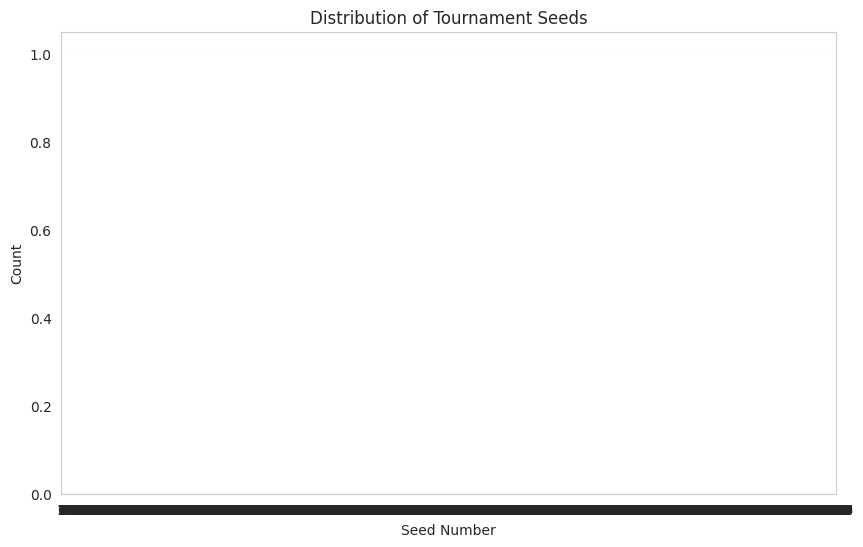

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(tourney_seeds["SeedNum"])
plt.title("Distribution of Tournament Seeds")
plt.xlabel("Seed Number")
plt.ylabel("Count")
plt.show()

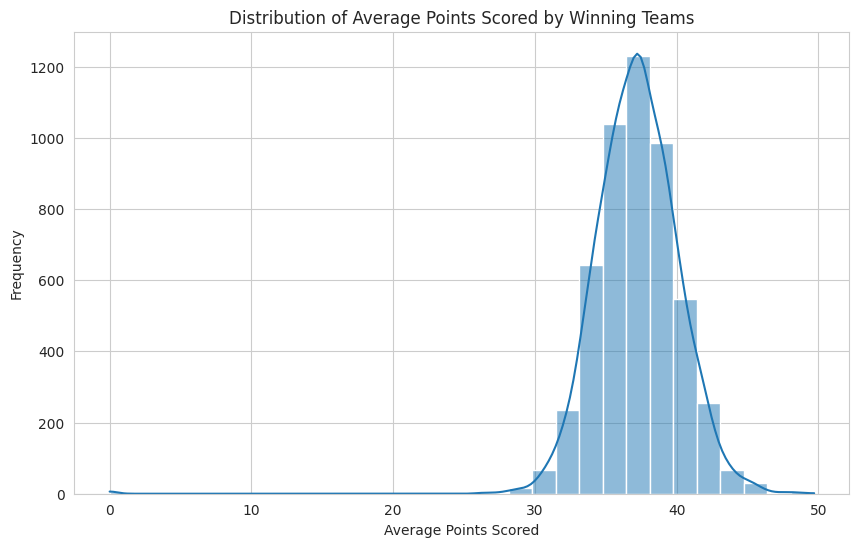

In [15]:
# Example: Points scored distribution
plt.figure(figsize=(10, 6))
sns.histplot(team_stats_combined["WScore_mean"], bins=30, kde=True)
plt.title("Distribution of Average Points Scored by Winning Teams")
plt.xlabel("Average Points Scored")
plt.ylabel("Frequency")
plt.show()

In [16]:
wins = regular_season.groupby(["Season", "WTeamID"]).size().reset_index(name="Wins")
losses = regular_season.groupby(["Season", "LTeamID"]).size().reset_index(name="Losses")

games_played = pd.merge(
    wins,
    losses,
    left_on=["Season", "WTeamID"],
    right_on=["Season", "LTeamID"],
    how="outer",
)
games_played["Wins"] = games_played["Wins"].fillna(0)
games_played["Losses"] = games_played["Losses"].fillna(0)
games_played["Games"] = games_played["Wins"] + games_played["Losses"]
games_played["TeamID"] = games_played["WTeamID"].fillna(games_played["LTeamID"])

team_stats_combined = pd.merge(
    team_stats_combined,
    games_played[["Season", "TeamID", "Games"]],
    on=["Season", "TeamID"],
    how="left",
)

In [17]:
team_stats_seeds = pd.merge(
    team_stats_combined,
    tourney_seeds[["Season", "TeamID", "SeedNum"]],
    on=["Season", "TeamID"],
    how="left",
)


def prepare_matchups(games_df):
    df = pd.merge(
        games_df,
        team_stats_seeds.add_prefix("TeamA_"),
        left_on=["Season", "WTeamID"],
        right_on=["TeamA_Season", "TeamA_TeamID"],
    )
    df = pd.merge(
        df,
        team_stats_seeds.add_prefix("TeamB_"),
        left_on=["Season", "LTeamID"],
        right_on=["TeamB_Season", "TeamB_TeamID"],
    )

    df = df.drop(
        columns=[col for col in df.columns if "Season_" in col or "TeamID_" in col]
    )

    df["Result"] = 1

    df["SeedDiff"] = df["TeamA_SeedNum"] - df["TeamB_SeedNum"]

    df["ScoreMeanDiff"] = df["TeamA_WScore_mean"] - df["TeamB_WScore_mean"]

    return df


tourney_results_filtered = tourney_results[tourney_results["Season"] >= 2003]
train_df = prepare_matchups(tourney_results_filtered)

Non-numeric columns: Index(['WLoc'], dtype='object')


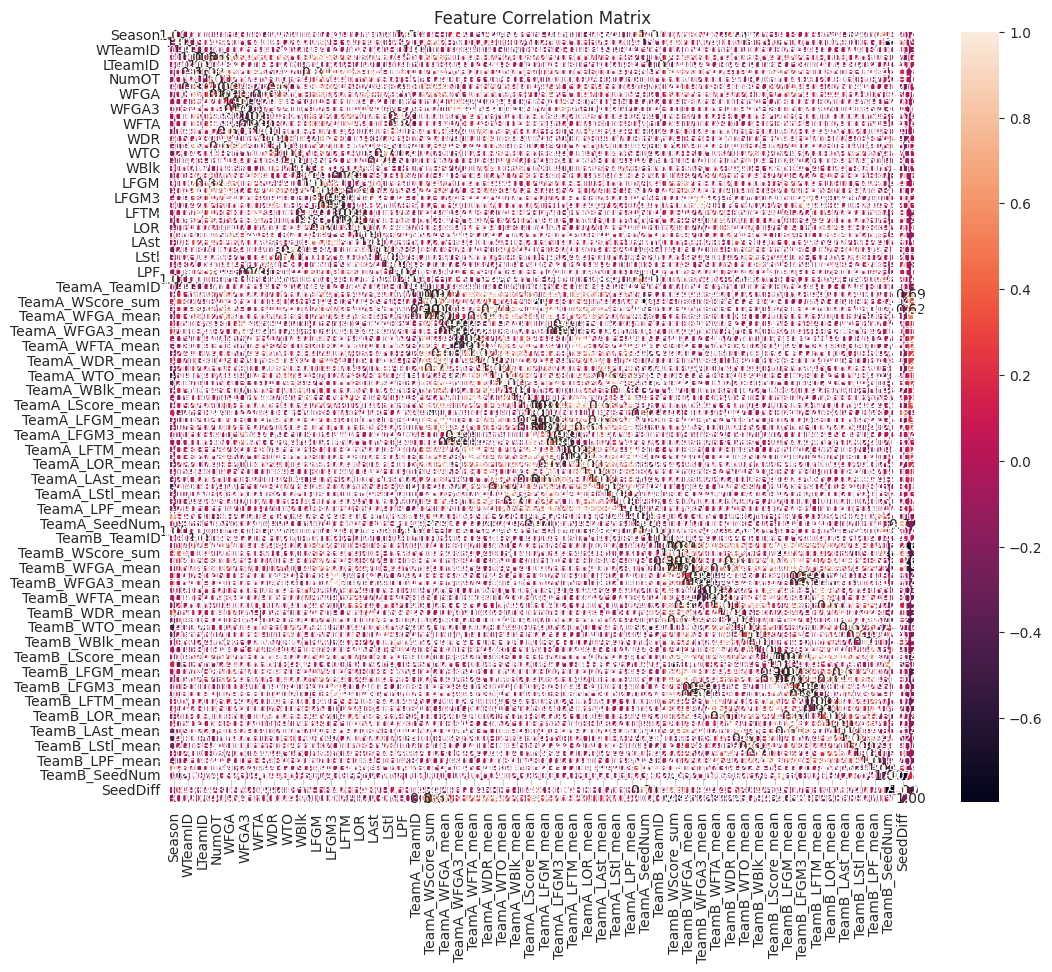

In [18]:
import numpy as np

non_numeric_cols = train_df.select_dtypes(include=["object"]).columns
print("Non-numeric columns:", non_numeric_cols)

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
numeric_df = train_df[numeric_cols]

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

features = ["SeedDiff", "ScoreMeanDiff"]
X = train_df[features]
y = train_df["Result"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("Class distribution in y_train:")
print(y_train.value_counts())

print("\nClass distribution in y_val:")
print(y_val.value_counts())

Class distribution in y_train:
Result
1    784
Name: count, dtype: int64

Class distribution in y_val:
Result
1    197
Name: count, dtype: int64


In [21]:
print("Unique values in train_df['Result']:")
print(train_df["Result"].unique())

Unique values in train_df['Result']:
[1]


In [22]:
def prepare_matchups(games_df):
    df_win = pd.merge(
        games_df,
        team_stats_seeds.add_prefix("TeamA_"),
        left_on=["Season", "WTeamID"],
        right_on=["TeamA_Season", "TeamA_TeamID"],
    )
    df_win = pd.merge(
        df_win,
        team_stats_seeds.add_prefix("TeamB_"),
        left_on=["Season", "LTeamID"],
        right_on=["TeamB_Season", "TeamB_TeamID"],
    )
    df_win["Result"] = 1

    df_loss = pd.merge(
        games_df,
        team_stats_seeds.add_prefix("TeamA_"),
        left_on=["Season", "LTeamID"],
        right_on=["TeamA_Season", "TeamA_TeamID"],
    )
    df_loss = pd.merge(
        df_loss,
        team_stats_seeds.add_prefix("TeamB_"),
        left_on=["Season", "WTeamID"],
        right_on=["TeamB_Season", "TeamB_TeamID"],
    )
    df_loss["Result"] = 0

    df = pd.concat([df_win, df_loss], ignore_index=True)

    df = df.drop(
        columns=[col for col in df.columns if "Season_" in col or "TeamID_" in col]
    )

    df["SeedDiff"] = df["TeamA_SeedNum"] - df["TeamB_SeedNum"]

    df["ScoreMeanDiff"] = df["TeamA_WScore_mean"] - df["TeamB_WScore_mean"]

    return df

In [23]:
train_df = prepare_matchups(tourney_results_filtered)

print("Unique values in train_df['Result'] after including both classes:")
print(train_df["Result"].unique())

print("\nClass distribution in train_df['Result']:")
print(train_df["Result"].value_counts())

Unique values in train_df['Result'] after including both classes:
[1 0]

Class distribution in train_df['Result']:
Result
1    981
0    981
Name: count, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

features = ["SeedDiff", "ScoreMeanDiff"]
X = train_df[features]
y = train_df["Result"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Class distribution in y_train after stratification:")
print(y_train.value_counts())

print("\nClass distribution in y_val after stratification:")
print(y_val.value_counts())

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_val)[:, 1]

val_log_loss = log_loss(y_val, y_pred_proba)
print(f"Validation Log Loss: {val_log_loss:.4f}")

y_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Class distribution in y_train after stratification:
Result
1    785
0    784
Name: count, dtype: int64

Class distribution in y_val after stratification:
Result
0    197
1    196
Name: count, dtype: int64
Validation Log Loss: 0.5629
Validation Accuracy: 0.7303


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"],
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring="neg_log_loss",
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Log Loss: {-grid_search.best_score_:.4f}")

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Log Loss: 0.5552


In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_log_loss")

print(f"Cross-Validation Log Loss: {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Log Loss: 0.5570 ± 0.0334


In [28]:
SAMPLE_SUBMISSION_PATH = "data/SampleSubmissionStage1.csv"

In [29]:
sample_sub = pd.read_csv(SAMPLE_SUBMISSION_PATH)

sample_sub["Season"] = sample_sub["ID"].apply(lambda x: int(x.split("_")[0]))
sample_sub["TeamA_TeamID"] = sample_sub["ID"].apply(lambda x: int(x.split("_")[1]))
sample_sub["TeamB_TeamID"] = sample_sub["ID"].apply(lambda x: int(x.split("_")[2]))

In [30]:
def prepare_test_data(sample_sub_df):
    df = pd.merge(
        sample_sub_df,
        team_stats_seeds.add_prefix("TeamA_"),
        left_on=["Season", "TeamA_TeamID"],
        right_on=["TeamA_Season", "TeamA_TeamID"],
        how="left",
    )

    df = pd.merge(
        df,
        team_stats_seeds.add_prefix("TeamB_"),
        left_on=["Season", "TeamB_TeamID"],
        right_on=["TeamB_Season", "TeamB_TeamID"],
        how="left",
    )

    df = df.drop(
        columns=[col for col in df.columns if "_Season" in col or "_TeamID" in col]
    )

    df["SeedDiff"] = df["TeamA_SeedNum"] - df["TeamB_SeedNum"]
    df["ScoreMeanDiff"] = df["TeamA_WScore_mean"] - df["TeamB_WScore_mean"]

    return df


test_df = prepare_test_data(sample_sub)

In [31]:
missing_cols = test_df.columns[test_df.isnull().any()].tolist()
print(f"Columns with missing values: {missing_cols}")

test_df[missing_cols] = test_df[missing_cols].fillna(0)

Columns with missing values: []


In [32]:
features = ["SeedDiff", "ScoreMeanDiff"]
X = train_df[features]
y = train_df["Result"]

print(type(X))
print(type(y))

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(type(X_train))
print(type(X_val))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X_train.columns, index=X_train.index
)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

model.fit(X_train_scaled, y_train)

y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]

val_log_loss = log_loss(y_val, y_pred_proba)
print(f"Validation Log Loss: {val_log_loss:.4f}")

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Validation Log Loss: 0.5628


In [33]:
X_test = test_df[features]

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

test_df["Pred"] = model.predict_proba(X_test_scaled)[:, 1]

submission = test_df[["ID", "Pred"]].copy()
submission["Pred"] = submission["Pred"].clip(0.05, 0.95)
print(
    f"Submission file has {submission.shape[0]} rows; expected {sample_sub.shape[0]} rows."
)

submission.to_csv("submission.csv", index=False)
print(submission.head())

Submission file has 9112 rows; expected 9112 rows.
               ID      Pred
0  2014_1107_1110  0.460151
1  2014_1107_1112  0.073681
2  2014_1107_1113  0.263644
3  2014_1107_1124  0.154982
4  2014_1107_1140  0.261244


In [34]:
SAMPLE_SUBMISSION_2_PATH = "data/SampleSubmissionStage2.csv"

sample_sub_2 = pd.read_csv(SAMPLE_SUBMISSION_2_PATH)

In [35]:
sample_sub_2["Season"] = sample_sub["ID"].apply(lambda x: int(x.split("_")[0]))
sample_sub_2["TeamA_TeamID"] = sample_sub["ID"].apply(lambda x: int(x.split("_")[1]))
sample_sub_2["TeamB_TeamID"] = sample_sub["ID"].apply(lambda x: int(x.split("_")[2]))

In [36]:
import re


def extract_seed_num(seed_str):
    seed_num = int(re.findall(r"\d+", seed_str)[0])
    if "a" in seed_str:
        seed_num -= 0.5
    elif "b" in seed_str:
        seed_num += 0.5
    return seed_num


tourney_seeds["SeedNum"] = tourney_seeds["Seed"].apply(extract_seed_num)

In [37]:
team_stats_seeds = team_stats_seeds.drop_duplicates(subset=["Season", "TeamID"])

In [38]:
test_df = prepare_test_data(sample_sub_2)
print("Number of rows in test_df:", test_df.shape[0])

Number of rows in test_df: 2278


In [39]:
sample_sub_2["Season"] = sample_sub_2["Season"].astype(int)
sample_sub_2["TeamA_TeamID"] = sample_sub_2["TeamA_TeamID"].astype(int)
sample_sub_2["TeamB_TeamID"] = sample_sub_2["TeamB_TeamID"].astype(int)
team_stats_seeds["Season"] = team_stats_seeds["Season"].astype(int)
team_stats_seeds["TeamID"] = team_stats_seeds["TeamID"].astype(int)

In [40]:
X_test = test_df[features]

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

test_df["Pred"] = model.predict_proba(X_test_scaled)[:, 1]

In [41]:
submission = test_df[["ID", "Pred"]].copy()
submission["Pred"] = submission["Pred"].clip(0.05, 0.95)
print(
    f"Submission file has {submission.shape[0]} rows; expected {sample_sub_2.shape[0]} rows."
)

Submission file has 2278 rows; expected 2278 rows.


In [42]:
submission.to_csv("submission.csv", index=False)
print(submission.head())

               ID      Pred
0  2018_1104_1112  0.460151
1  2018_1104_1113  0.073681
2  2018_1104_1116  0.263644
3  2018_1104_1120  0.154982
4  2018_1104_1137  0.261244


I had some problems with the rows because of missing stage 2 at the final steps.

Still not have the score yet, because I couldn't find data from 2018 to 2022 (the submission told me I'm missing some 2022 match?), must I crawl and organize it myself? Or am I missing something.

However, the log loss is here (0.5552). Hope that's a pass.
